# Local Analysis Part 2: Analysis of Localized Story Stats

Our Local Analysis focuses on the occurrence of repeated words, rhymes and unique rhymes in a given section. To do this, we took the 10 words before and the 10 words after every token in each story, in each corpus.

For this analysis, we have investigated 3 elements in the Dr. Seuss and Comparison corpora:
1. Word frequency (repeated instances of that token)
2. Total rhyme frequency (all rhymes: repeated and not repeated)
3. Unique rhyme frequency (only non-repeated rhymes)

For this, we look at the data available in our two corpora. 

Furthermore, for greater accuracy, we conducted a bootstrap analysis on each of the three categories both both corpora, sampling the data with replacement 10,000 times and calculating the mean different between the two samples each time. We then calculated the mean of the mean differences as well as the 95% confidence intervals. And finally we illustrated each of the three sets of bootstraps in a histogram and normal distribution plot.

---

### Set Up

In [1]:
# import packages
import os
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, HTML # remove later?

# import necessary previous notebooks
from IPython.utils.io import capture_output

with capture_output():
    %run 1_Set_Up.ipynb
    %run 5_Local_Analysis_Part1.ipynb
    %run functions.ipynb

#### Create one large data frame with all Seuss Stories and one large data frame with all comparisons stories.

In [2]:
combined_seuss_df = pd.concat(seuss_dataframes, ignore_index=True)
combined_comparison_df = pd.concat(comp_dataframes, ignore_index=True)

*This is what each chunk looks like:*

In [3]:
# Local analysis dataframe for Dr. Seuss corpus
combined_seuss_df

,Title,Token,Chunk,Word Frequency,Rhyme Frequency,Unique Rhyme Frequency
0,a-b-c.txt,big,"a, little, a, what, begins, with, a, aunt, ann...",0,0,0
1,a-b-c.txt,a,"big, little, a, what, begins, with, a, aunt, a...",2,0,0
2,a-b-c.txt,little,"big, a, a, what, begins, with, a, aunt, annies...",0,0,0
3,a-b-c.txt,a,"big, a, little, what, begins, with, a, aunt, a...",2,0,0
4,a-b-c.txt,what,"big, a, little, a, begins, with, a, aunt, anni...",0,0,0
...,...,...,...,...,...,...
20655,yertle-the-turtle.txt,maybe,"of, course, all, the, turtles, are, free, as, ...",0,0,0
20656,yertle-the-turtle.txt,all,"course, all, the, turtles, are, free, as, turt...",1,0,0
20657,yertle-the-turtle.txt,creatures,"all, the, turtles, are, free, as, turtles, and...",0,0,0
20658,yertle-the-turtle.txt,should,"the, turtles, are, free, as, turtles, and, may...",0,0,0


In [4]:
# Local analysis dataframe for Dr. Seuss corpus
combined_comparison_df

,Title,Token,Chunk,Word Frequency,Rhyme Frequency,Unique Rhyme Frequency
0,edward-lear-akond-of-swat.txt,who,"or, why, or, which, or, what, is, the, akond, of",0,0,0
1,edward-lear-akond-of-swat.txt,or,"who, why, or, which, or, what, is, the, akond,...",2,0,0
2,edward-lear-akond-of-swat.txt,why,"who, or, or, which, or, what, is, the, akond, ...",0,0,0
3,edward-lear-akond-of-swat.txt,or,"who, or, why, which, or, what, is, the, akond,...",2,0,0
4,edward-lear-akond-of-swat.txt,which,"who, or, why, or, or, what, is, the, akond, of...",0,0,0
...,...,...,...,...,...,...
19151,winnie-the-pooh-stuck-at-rabbits-house.txt,to,"himself, but, christopher, robin, looked, afte...",0,0,0
19152,winnie-the-pooh-stuck-at-rabbits-house.txt,himself,"but, christopher, robin, looked, after, him, l...",0,0,0
19153,winnie-the-pooh-stuck-at-rabbits-house.txt,silly,"christopher, robin, looked, after, him, loving...",0,0,0
19154,winnie-the-pooh-stuck-at-rabbits-house.txt,old,"robin, looked, after, him, lovingly, and, said...",0,0,0


---
## Histograms of Word Scores

### Analysis of Localized Word Frequency
#### Histogram
Here, we plot the distribution of word frequency scores in the Dr. Seuss corpus and the comparison corpus.

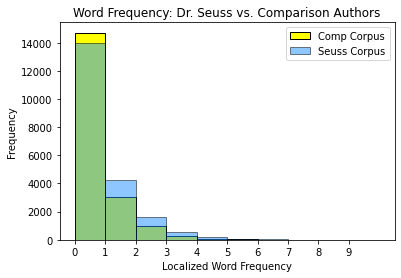

In [5]:
# Define the bin edges for whole numbers
bins = range(0, max(combined_comparison_df['Word Frequency'].max(), 
                    combined_seuss_df['Word Frequency'].max()) + 2)

# Plot histograms for both datasets with aligned bins
plt.hist(combined_comparison_df['Word Frequency'], bins=bins, alpha=1, label='Comp Corpus', color='yellow', edgecolor='black')
plt.hist(combined_seuss_df['Word Frequency'], bins=bins, alpha=0.5, label='Seuss Corpus', color='dodgerblue', edgecolor='black')

# Add title, legend, and labels
plt.title('Word Frequency: Dr. Seuss vs. Comparison Authors')
plt.xlabel('Localized Word Frequency')
plt.ylabel('Frequency')
plt.xticks(range(0, max(bins)))  # Ensure x-ticks are whole numbers
plt.legend()

# Show the plot
plt.show()

Dr Seuss has fewer word frequencies with a values of 0, compared to the comparison authors. This means that the comparison authors have a higher score of words that are NOT repeated. Dr. Seuss has higher scores for word frequencies greater than 1, which means that he has more words in a single sections that are repeated, compared with the comparison authors.

---

### Histogram of Localized Total Rhyme Frequency

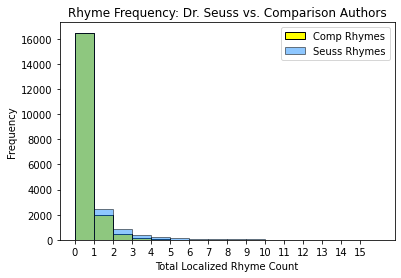

In [6]:
# Define the bin edges for whole numbers
bins = range(0, max(combined_comparison_df['Rhyme Frequency'].max(), 
                    combined_seuss_df['Rhyme Frequency'].max()) + 2)

# Plot histograms for both datasets with aligned bins
plt.hist(combined_comparison_df['Rhyme Frequency'], bins=bins, alpha=1, label='Comp Rhymes', color='yellow', edgecolor='black')
plt.hist(combined_seuss_df['Rhyme Frequency'], bins=bins, alpha=0.5, label='Seuss Rhymes', color='dodgerblue', edgecolor='black')

# Add title, legend, and labels
plt.title('Rhyme Frequency: Dr. Seuss vs. Comparison Authors')
plt.xlabel('Total Localized Rhyme Count')
plt.ylabel('Frequency')
plt.xticks(range(0, max(bins)))  # Ensure x-ticks are whole numbers
plt.legend()

# Show the plot
plt.show()

Dr. Seuss and the comparison authors appear to have the same number of words in a given section with 0 rhymes. However, Dr. Seuss has a greater number of words with 1 rhyme, 2 rhymes, 3 rhymes, etc. So it would seem that Dr. Seuss is more rhyme-y!

To look at this further, we must investigate the use of unique rhymes. And author isn't creative unless he is unique!

---

### Histogram of Localized UNIQUE Rhyme Frequency

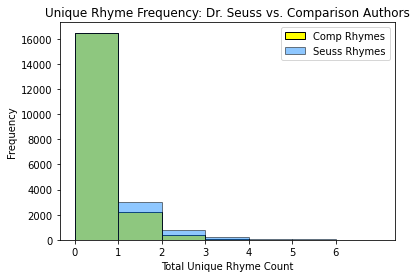

In [7]:
# Define the bin edges for whole numbers
bins = range(0, max(combined_comparison_df['Unique Rhyme Frequency'].max(), 
                    combined_seuss_df['Unique Rhyme Frequency'].max()) + 2)

# Plot histograms for both datasets with aligned bins
plt.hist(combined_comparison_df['Unique Rhyme Frequency'], bins=bins, alpha=1, label='Comp Rhymes', color='yellow', edgecolor='black')
plt.hist(combined_seuss_df['Unique Rhyme Frequency'], bins=bins, alpha=0.5, label='Seuss Rhymes', color='dodgerblue', edgecolor='black')

# Add title, legend, and labels
plt.title('Unique Rhyme Frequency: Dr. Seuss vs. Comparison Authors')
plt.xlabel('Total Unique Rhyme Count')
plt.ylabel('Frequency')
plt.xticks(range(0, max(bins)))  # Ensure x-ticks are whole numbers
plt.legend()

# Show the plot
plt.show()

Dr. Seuss and the comparison authors have roughly the same number of of words with 0 unique rhyme count. But, Dr. Seuss has more words with a unique rhyme count of 1, 2 ,3 4, and 5! So he must be more rhyme-y... right?

Well... to make sure, we conduct a bootstrap analysis:

---
---

## Bootstrapping Comparisons of Localized values

We conduct the bootstrap on the same categories:

1. Word frequency (repeated instances of that token)
2. Total rhyme frequency (all rhymes: repeated and not repeated)
3. Unique rhyme frequency (only non-repeated rhymes)

_Note: The bootstrap functions have been imported from functions.ipynb._

### Bootstrap Analysis 1: Word Frequency

In [8]:
# This is what the Dr. Seuss and Comparison Corpus Word Frequencies look like:
print(combined_seuss_df["Word Frequency"][1:5])
print(combined_comparison_df["Word Frequency"][1:5])

1    2
2    0
3    2
4    0
Name: Word Frequency, dtype: int64
1    2
2    0
3    2
4    0
Name: Word Frequency, dtype: int64


In [9]:
# Length of each word frequency
print(len(combined_seuss_df["Word Frequency"]))
print(len(combined_comparison_df["Word Frequency"]))

20660
19156


In [10]:
# Means of Dr. Seuss and Comparison Corpus Word Frequencies
print(round(np.mean(combined_seuss_df["Word Frequency"]),4))
print(round(np.mean(combined_comparison_df["Word Frequency"]),4))

0.5172
0.3315


**It appears that the Dr. Seuss WORD Frequency is higher than the comparison corpus WORD frequency. Lets use the bootstrap to test this out:**

In [11]:
# Convert your data to numpy arrays for easier manipulation
data1 = combined_seuss_df["Word Frequency"].to_numpy()
data2 = combined_comparison_df["Word Frequency"].to_numpy()

print(f"Bootstrap Mean Difference: {bootstrap_mean(data1, data2)[0]}")
print(f"95% Confidence Interval: {bootstrap_mean(data1, data2)[1]}")

Bootstrap Mean Difference: 0.1857
95% Confidence Interval: (0.1694, 0.2017)


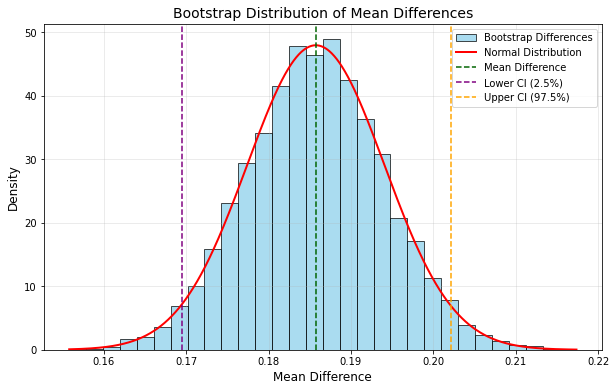

In [12]:
plot_bootstrap_diff(data1, data2)

**Description for bootstrap 1:** the difference in the means of the word frequency score of the Dr. Seuss corpus and the comparison corpus is 0.1857. The _**confidence interval does not contain 0**_, it lies between (0.17, 0.2) – which means that this result is statistically significant! This means that Dr. Seuss _does_ tend to repeat words more than the other (comparison) writers.


Now... lets try this with the Rhyme Frequency:


### Bootstrap Analysis 2: Rhyme Frequency

In [13]:
# This is what the Dr. Seuss and Comparison Corpus Rhyme Frequencies look like:
print(combined_seuss_df["Rhyme Frequency"][1:5])
print(combined_comparison_df["Rhyme Frequency"][1:5])

1    0
2    0
3    0
4    0
Name: Rhyme Frequency, dtype: int64
1    0
2    0
3    0
4    0
Name: Rhyme Frequency, dtype: int64


In [14]:
# Means of Dr. Seuss and Comparison Corpus Rhyme Frequencies
print(round(np.mean(combined_seuss_df["Rhyme Frequency"]),4))
print(round(np.mean(combined_comparison_df["Rhyme Frequency"]),4))

0.3872
0.1895


**It appears that the Dr. Seuss RHYME Frequency is higher than the comparison corpus RHYME frequency. Lets use the bootstrap to test this out:**

In [15]:
# Convert your data to numpy arrays for easier manipulation
data1 = combined_seuss_df["Rhyme Frequency"].to_numpy()
data2 = combined_comparison_df["Rhyme Frequency"].to_numpy()

print(f"Bootstrap Mean Difference: {bootstrap_mean(data1, data2)[0]}")
print(f"95% Confidence Interval: {bootstrap_mean(data1, data2)[1]}")

Bootstrap Mean Difference: 0.1976
95% Confidence Interval: (0.1814, 0.214)


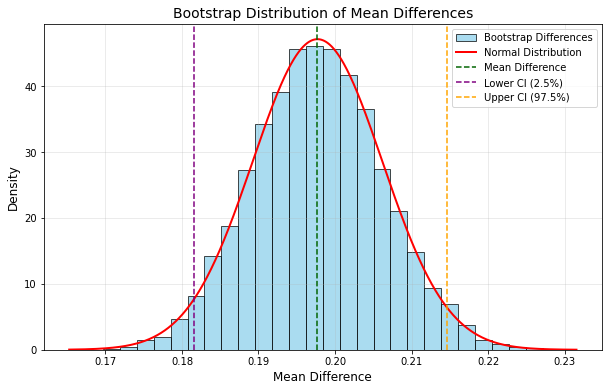

In [16]:
plot_bootstrap_diff(data1, data2)

**Description for bootstrap 2:** the difference in the means of the rhyme frequency score of the Dr. Seuss corpus and the comparisons corpus is 0.1976. Once again, the _**confidence interval does not contain 0**_, it lies between (0.18, 0.21) – which means that this result is statistically significant! So Dr Seuss does tend to rhyme words more than the other (comparison) writers.


Finally, lets test out that UNIQUE rhyme frequency:

### Bootstrap Analysis 3: Unique Rhyme 

In [17]:
# This is what the Dr. Seuss and Comparison Corpus UNIQUE Rhyme Frequencies look like:
print(combined_seuss_df["Unique Rhyme Frequency"][1:5])
print(combined_comparison_df["Unique Rhyme Frequency"][1:5])

1    0
2    0
3    0
4    0
Name: Unique Rhyme Frequency, dtype: int64
1    0
2    0
3    0
4    0
Name: Unique Rhyme Frequency, dtype: int64


In [18]:
# Means of Dr. Seuss and Comparison Corpus UNIQUE Rhyme Frequencies
print(round(np.mean(combined_seuss_df["Unique Rhyme Frequency"]),4))
print(round(np.mean(combined_comparison_df["Unique Rhyme Frequency"]),4))

0.2854
0.1639


**It appears that the Dr. Seuss UNIQUE RHYME Frequency is ALSO higher than the comparison corpus UNIQUE RHYME frequency. Lets use the bootstrap to test this out:**

In [19]:
# Convert your data to numpy arrays for easier manipulation
data1 = combined_seuss_df["Unique Rhyme Frequency"].to_numpy()
data2 = combined_comparison_df["Unique Rhyme Frequency"].to_numpy()

print(f"Bootstrap Mean Difference: {bootstrap_mean(data1, data2)[0]}")
print(f"95% Confidence Interval: {bootstrap_mean(data1, data2)[1]}")

Bootstrap Mean Difference: 0.1216
95% Confidence Interval: (0.1103, 0.1327)


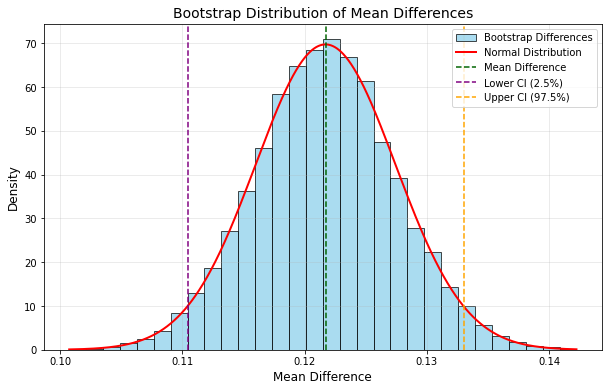

In [20]:
plot_bootstrap_diff(data1, data2)

**Description for bootstrap 3:** the difference in the means of the UNIQUE rhyme frequency score of the Dr. Seuss corpus and the comparisons corpus is 0.1216. This is lower than the total rhyme frequency, but higher than zero. The _**confidence interval does not contain 0**_, it lies between (0.11, 0.13) – so the result is statistically significant. This means that Dr. Seuss tends to rhyme UNIQUELY more frequently than the other writers, not not as much as he rhymes more than than other writers.

So – Dr. Seuss is more rhyme-y overall, taking some help from repeating words AND taking some help from just being a unique and creative poet!

It is important to note that due to about 100 of his words not being present in the pronouncing package, with his made up words Dr. Seuss is predicted to be EVEN MORE rhyme-y than our analysis currently shows. 